<div style="text-align: right"> 24.01.2020</div>

***Name:*** 

# Hausaufgabe Blatt 11

## Kinetische Gastheorie: Maxwell-Boltzmann-Verteilung

In dieser Aufgabe werden wir uns mit der kinetischen Gastheorie und der Maxwell-Boltzmann-Verteilung beschäftigen. Die genaue Herleitung der Maxwell-Boltzmann-Verteilung können Sie Kapitel 7.3.5 "Experimentalphysik I" von W. Demtröder entnehmen. 

Betrachtet man die Moleküle eines Gases als Teilchen, die lediglich durch elastische Stöße sowohl mit den Wänden ihrer Umgebung als auch untereinander wechselwirken, so spricht man von einem *idealen Gas*. 

## 1. Aufgabe
Misst man die Beträge der Geschwindigkeiten von einem idealen Gas, so stellt man fest, dass diese durch die Maxwell-Boltzmann-Verteilung beschrieben werden. Hier ist $v$ die Geschwindigkeit der Teilchen, $m$ die Masse der Teilchen, $T$ die Temperatur und $k_B$ die Boltzmann-Konstante 

$$\tag{1}
f\!\left(v\right)=4 \pi v^2 \cdot \left(\frac{m}{2 \pi k_B T}\right)^{3/2} \cdot \exp\left(\frac{-m v^2}{2 k_B T}\right).
$$

Diese Verteilung kann wie folgt begründet werden. Da keine Raumrichtung ausgezeichnet ist und die Teilchen ständig miteinander und ihrer Umgebung kollidieren, kann man annehmen, dass die Geschwindigkeiten für alle drei Komponenten $v_{\alpha}$, mit $\alpha = x, y,z$ zufällig verteilt sind.

Wir wollen nun diese Verteilung reproduzieren, indem wir Geschwindigkeitskomponenten $v_{\alpha}$, mit $\alpha = x, y,z$, für $N$ Teilchen zufällig aus einer Normalverteilung $\mathcal N$ mit Mittelwert gleich 0 und einer Standardabweichung von 1 ziehen
   $$\tag{2}
   v_{\alpha} = \sqrt{\frac{k_B T}{m}} \cdot \mathcal N\! \left(0,1\right).
   $$
   
Normalverteilte Zahlen mit Mittelwert gleich 0 und einer Standardabweichung von 1 können wie folgt erzeugt werden; hier werden Zufallszahlen für $N=5$ Teilchen in 3 Dimensionen erzeugt (daher (N,3)).
 ```python
import numpy as np
N = 5
gauss = np.random.normal(0,1,(N,3))
``` 

**a)** Versuchen Sie den obigen Code nachzuvollziehen. Erstellen Sie für $N=100$ Teilchen Zufallszahlen für jede Geschwindigkeitskomponente $\alpha=x, y, z$, indem Sie obigen Code und Gleichung (2) kombinieren. Nehmen Sie dabei für die Masse $m = 4.8 \cdot 10^{-3}$, für die Temperatur $T=70$ und für die Boltzmann Konstante $k_B=1.38$ an.


In [2]:
### Loesung
import numpy as np
m = 4.8e-3
kB = 1.38
T1 = 70
N = 100

sigmaSquared1 = kB * T1/m
sigma1 = np.sqrt(sigmaSquared1)

# sigmaSquared2 = kB * T2/m
# sigma2 = np.sqrt(sigmaSquared2)

v1 = np.random.normal(0,1,(N,3)) * sigma1

**b)** Berechnen Sie nun den Betrag der Geschwindigkeit $v$ aus den Geschwindigkeitskomponenten $\alpha=x,y,z$ für jede der $N=100$ erzeugten Zahlen. Benutzen Sie dafür die Normierungsfunktion `np.linalg.norm()` wie folgt: 
```python
norm = np.linalg.norm(geschwindigkeit, axis=1)
```
Das Stichwort `axis` gibt an, über welche Einträge des arrays der Betrag berechnet wird. 

In [6]:
### Loesung
speed1 = np.linalg.norm(v1,axis=1)
print(speed1)

[201.28049617 281.27105772 308.38801956  69.44609247 277.68830937
 288.7530904   50.91840759 185.82385475  98.38963298  69.68977503
 332.9842847  174.86786668 192.67391968 256.85016441 335.52132527
 115.20125272 192.98809781 205.94273615 263.95999374 287.68757323
 386.40368924 193.64050023  50.11683626  35.77626378 381.66619047
  78.86634334 115.86890439 350.36600078 248.34836669 281.9510401
  93.67080182 151.9288349  179.05087428 199.92154094 163.88269048
 283.81516411 202.21443345 377.74194802 295.5507151  202.27565615
  52.24644205 162.49086559 279.38399688  74.19774096  95.27869912
 344.28715374  84.87208401 306.82691572 195.02710624 373.54860879
 189.16434494 151.33716777 264.83443418 243.97813561 263.94255225
 228.58001778 239.85177407 136.44141252 225.511921   118.56903197
 206.58459764 339.00428949 206.90582283 159.95735382 169.14583093
 178.42130892 364.28576714 418.03284392 188.75793453 410.20853784
 159.35690854 182.4695045  250.19328082 259.82929172 142.78873433
 276.484782

**c)** Erstellen Sie ein Histogramm aus den gerade berechneten Beträgen der Geschwindigkeit $v$. Benutzen Sie dafür den Histogramm Befehl `ax.histo()` wie folgt:
``` 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.histo(v, density=True)```

Dabei stellt das Stichwort `density=True` sicher, dass das Histogramm normiert ist. Führen Sie sinnvolle Achsenbeschriftungen ein. Kommentieren Sie jede Zeile des Codes sinnvoll.

Text(0, 0.5, '$f\\left(v\\right)$')

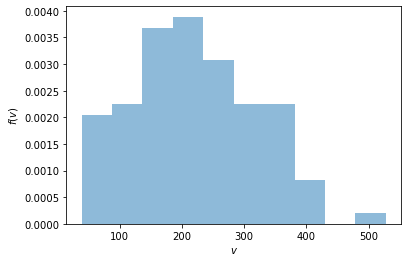

In [5]:
### Loesung
import matplotlib.pyplot as plt # lade Bibliothek zum Plotten
fig, ax = plt.subplots() # Definiere fig und ax abhängig vom Plot

ax.hist(speed1,density=True, alpha=0.5) # Berechne und erstelle HIstogramm
ax.set_xlabel("$v$") # label x Achse
ax.set_ylabel("$f\\left(v\\right)$") # label y Achse

**d)** Schreiben Sie eine Funktion, die als Argument ein array von Beträgen von Geschwindigkeiten und eine Temperatur annimmt und die Maxwell-Boltzmann Verteilung (Gleichung (1)) zurückgibt. Tipp: Sie können einen Array mit Werten mit gleichem Abstand mit ```np.arange``` erzeugen. Vergleichen Sie die theoretisch erwartete Verteilung mit Ihrer erzeugten in einem gemeinsamen Plot.  Kommentieren Sie jede Zeile des Codes sinnvoll.

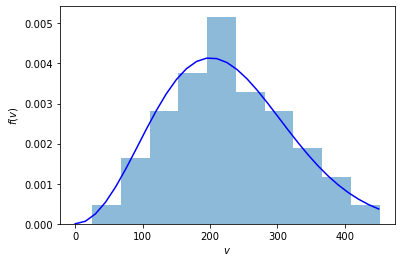

In [8]:
### Loesung
def maxwell(v,T): # definiere Funktion
    return(4*np.pi*v**2*np.sqrt(m/(2*np.pi*kB*T))**3 * np.exp(-m*v**2/(2*kB*T)))

# Definiere Geschwindigkeitsarray:
delta = 15 # Abstand der Geschwindigkeiten
vTheo1 = np.arange(0, np.amax(speed1), delta) # Geschwindigkeitsarray

# plot
fig, ax = plt.subplots() # Definiere Plot-Abkürzungen
vals1 = ax.hist(speed1, density=True, alpha=0.5) # plotte Histogramm der zufälligen Werte
ax.plot(vTheo1, maxwell(vTheo1,T1), color="blue") # plotte erwartete, berechente Verteilung
ax.set_xlabel("$v$") # label x Achse
ax.set_ylabel("$f\\left(v\\right)$") # label y-Achse
plt.show()

**e)** Wiederholen Sie Aufgaben **a)**-**d)** für $N=10000$ Teilchen.  Optional können Sie auch die Temperatur auf $T=290$ ändern. 
Was stellen Sie fest?

Ich stelle fest, dass sich die Verteilung für große $N$ der Maxwell-Boltzmann Verteilung annähert.

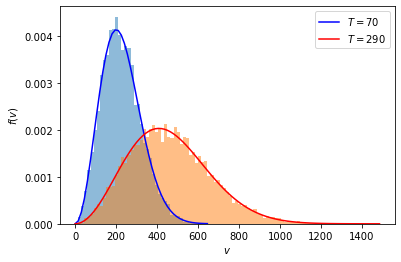

In [5]:
### Loesung (mit optional anderer Temperatur.)
import numpy as np # lade numpy
import matplotlib.pyplot as plt # lade matplotlib

# definiere Konstanten
m = 4.8e-3 # Masse
kB = 1.38 # Boltzmann-Konstante
T1 = 70 # erster Temperaturwert
T2 = 290 # zweiter Temperaturwert
N = 10000 # Teilchenanzahl
sigmaSquared1 = kB * T1/m # mittlere quadratische Geschwindigkeit in einer Dimension für erste Temperatur
sigma1 = np.sqrt(sigmaSquared1) # mittlere Geschwindigkeit in einer Dimension

sigmaSquared2 = kB * T2/m # gleiche Berechnung für zweite Temperatur
sigma2 = np.sqrt(sigmaSquared2) # gleiche Berechnung für zweite Temperatur

v1 = np.random.normal(0,1,(N,3)) * sigma1 # Gesamtgeschwindigkeit erste Temperatur
v2 = np.random.normal(0,1,(N,3)) * sigma2 # Gesamtgeschwindigkeit zweite Temperatur

delta = 15 # Abstand zwischen Geschwindigkeiten im Geschwindigkeitsarray
speed1 = np.linalg.norm(v1,axis=1) # normierte Geschwindigkeit 1
vTheo1 = np.arange(0, np.amax(speed1), delta) # Geschwindigkeit für x Achse 1

speed2 = np.linalg.norm(v2,axis=1) # normierte Geschwindigkeit 2 
vTheo2 = np.arange(0, np.amax(speed2), delta) # Geschwindigkeit für x Achse 2

fig, ax = plt.subplots() # Plot-Abkürzungen

vals1 = ax.hist(speed1, density=True, bins=vTheo1, alpha=0.5) # Histogramm für Temperatur 1
vals2 = ax.hist(speed2, density=True, bins=vTheo2,alpha=0.5) # Histogramm für Temperatur 2
ax.plot(vTheo1, maxwell(vTheo1,T1), color="blue", label="$T=70$") # Plot 1
ax.plot(vTheo2, maxwell(vTheo2,T2), color="red", label="$T=290$") # Plot 2
ax.set_xlabel("$v$") # label x Achse
ax.set_ylabel("$f\\left(v\\right)$") # label y-Achse

ax.legend() # zeige legende
plt.show()